# Shopping Behavior

This is a dataset of customer purchasing behavior (Retail/E-commerce Transactions) from 3,900 customers, covering details across three main dimensions:

Customer Demographics: Age, Gender, Location

Transaction Information: Item/Category, Purchase Amount, Color, Size, Season

Behavior & Loyalty: Subscription status, Use of discount/promo codes, Payment method, Purchase frequency, and Review rating

# **ATTRIBUTE**
1.Customer ID  

2.Age

3.Gender

4.Item Purchased

5.Category

6.Purchase Amount (USD)

7.Location

8.Size

9.Color

10.Season

11.Review Rating

12.Subscription Status

13.Shipping Type

14.Discount Applied

15.Promo Code Used

16.Previous Purchases

17.Payment Method

18.Frequency of Purchases

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

### นำข้อมูลเข้า

In [ ]:
#นำเข้าข้อมูล
df = pd.read_csv('shopping.csv')
df.head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


###  ตรวจสอบและทำความสะอาดข้อมูล

In [ ]:
#เช็คจำนวนrow
df.shape

(3900, 18)

In [ ]:
#เช็คdata type
df.dtypes

,0
Customer ID,int64
Age,int64
Gender,object
Item Purchased,object
Category,object
Purchase Amount (USD),int64
Location,object
Size,object
Color,object
Season,object


In [ ]:
#ตรวจสอบข้อมูล
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [ ]:
#ตรวจสอบข้อมูลว่าง (NULL)
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [ ]:
# เช็คว่าซ้ำมั้ย
df.duplicated().sum()

np.int64(0)

# removing the customer id column because it not much important

In [ ]:
df.drop(columns='Customer ID',inplace=True)

### สำรวจข้อมูลด้วยค่าทางสถิติ

In [ ]:
df.describe()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,3.749949,25.351538
std,15.207589,23.685392,0.716223,14.447125
min,18.000000,20.000000,2.500000,1.000000
25%,31.000000,39.000000,3.100000,13.000000
50%,44.000000,60.000000,3.700000,25.000000
75%,57.000000,81.000000,4.400000,38.000000
max,70.000000,100.000000,5.000000,50.000000


# checking outlier

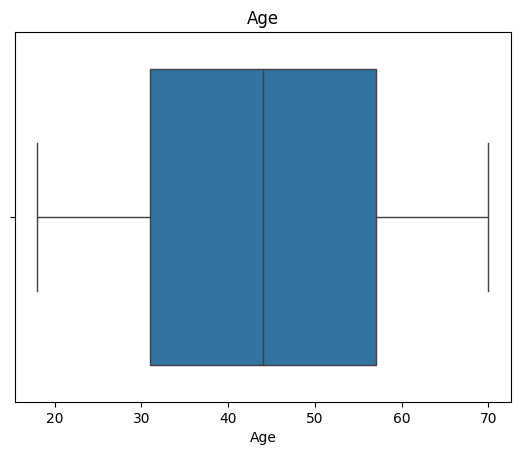

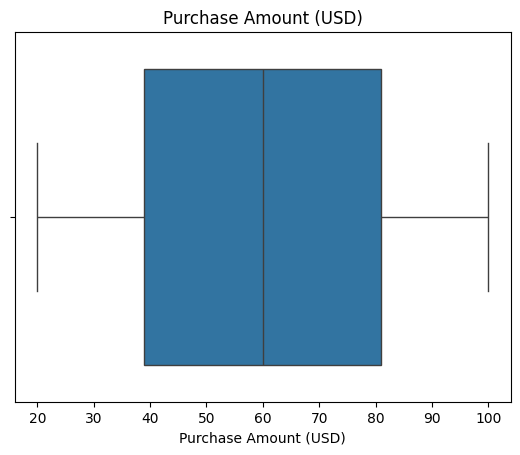

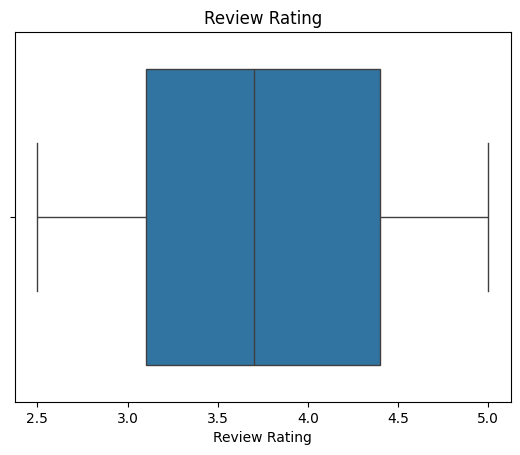

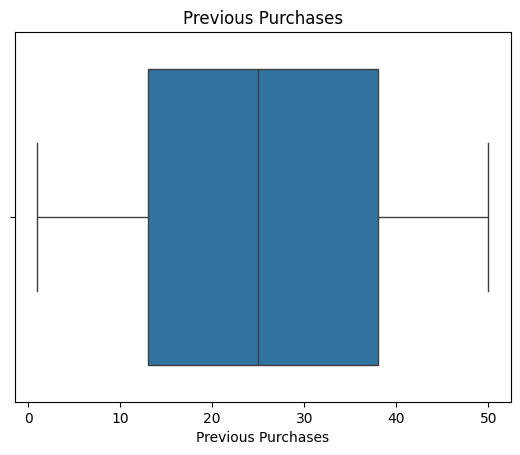

In [ ]:
for col in df.columns:
    if df[col].dtype != 'object':
        sns.boxplot(x=df[col])
        plt.title(col)
        plt.show()

##  Correlation Heatmap

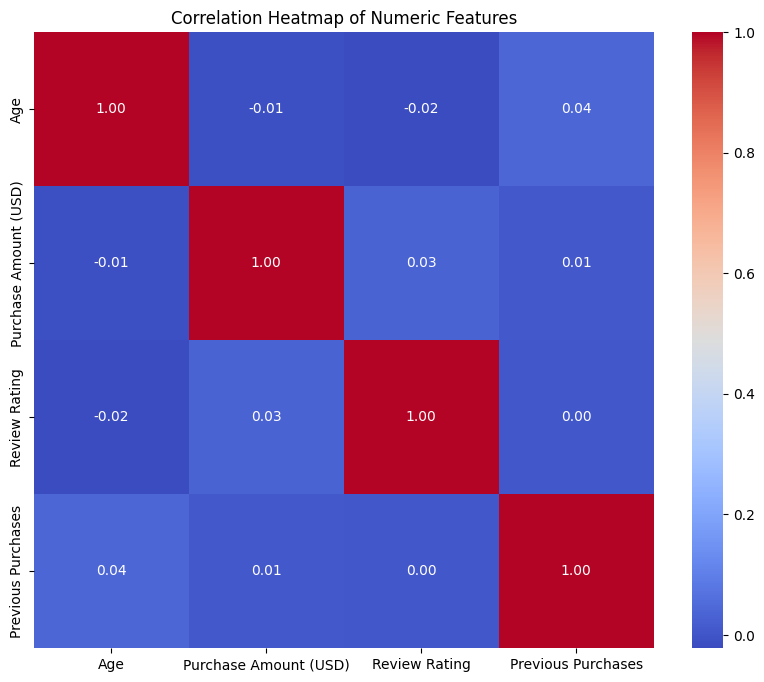

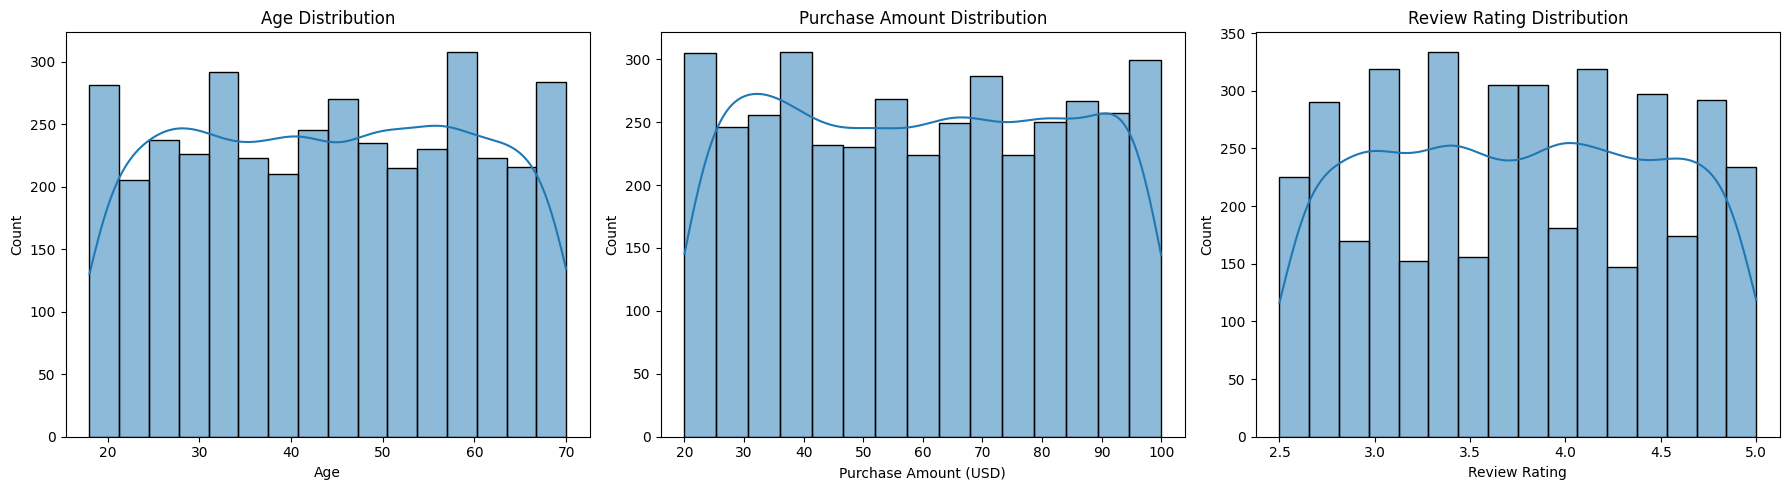

In [ ]:
## 1. Correlation Heatmap for numeric columns (if 4 or more numeric features exist)
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()

## 2. Histograms for key numeric features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['Age'], kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')

sns.histplot(df['Purchase Amount (USD)'], kde=True, ax=axes[1])
axes[1].set_title('Purchase Amount Distribution')

sns.histplot(df['Review Rating'], kde=True, ax=axes[2])
axes[2].set_title('Review Rating Distribution')

plt.tight_layout()
plt.show()



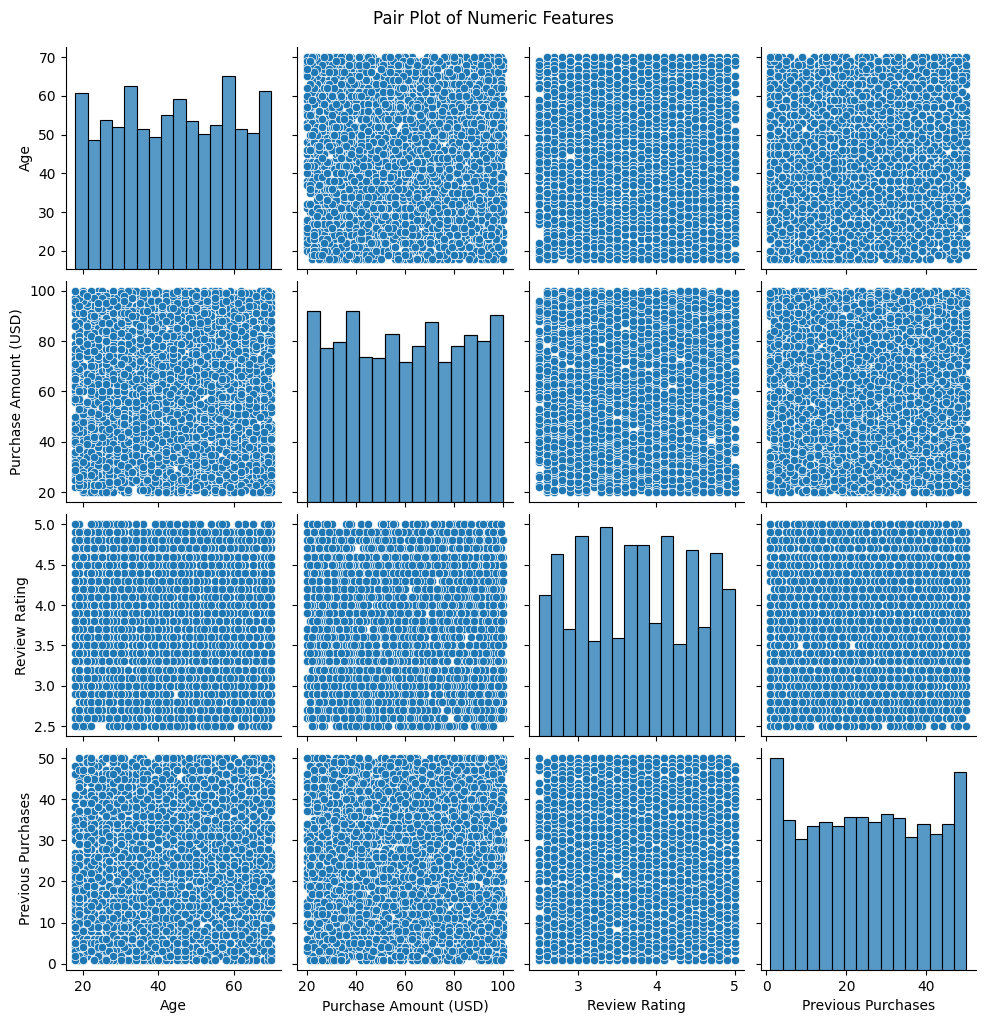

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(numeric_df)
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()

# แสดงกราฟ
plt.show()

# การกระจายของจุด: จุดข้อมูลมีการกระจายตัวค่อนข้างสม่ำเสมอและหนาแน่นในลักษณะคล้ายรูปสี่เหลี่ยมผืนผ้า หรือ "เมฆ" ที่ไม่มีรูปแบบที่ชัดเจน

# ข้อสรุป: การกระจายตัวที่ไม่มีแนวโน้ม (เช่น ไม่เอียงขึ้นหรือเอียงลง)
# ในชุดข้อมูลนี้นั่นคือ ไม่มีความสัมพันธ์ที่ชัดเจนระหว่างอายุของบุคคล ,จำนวนเงินที่พวกเขาใช้ในการซื้อสินค้า และคะแนนรีวิว

# Hypothesis Testing

In [8]:
import pandas as pd
from scipy import stats

# 1. โหลดข้อมูล
df = pd.read_csv('shopping.csv')

# 2. เตรียมข้อมูล 2 กลุ่ม
# กลุ่ม A: ใช้ส่วนลด (Yes)
group_yes = df[df['Discount Applied'] == 'Yes']['Purchase Amount (USD)']
# กลุ่ม B: ไม่ใช้ส่วนลด (No)
group_no = df[df['Discount Applied'] == 'No']['Purchase Amount (USD)']

# 3. ทดสอบความแปรปรวน (Levene's Test) - เพื่อความแม่นยำสูงสุด
# ถ้า p > 0.05 แสดงว่าความแปรปรวนเท่ากัน (equal_var=True)
stat_var, p_var = stats.levene(group_yes, group_no)
equal_var_assumption = True if p_var > 0.05 else False

# 4. คำนวณ T-Test
t_stat, p_value = stats.ttest_ind(group_yes, group_no, equal_var=equal_var_assumption)

# 5. แสดงผลลัพธ์
print(f"--- ผลการทดสอบสมมติฐาน (Hypothesis Testing) ---")
print(f"จำนวนกลุ่ม Discount Yes: {len(group_yes)} คน | ค่าเฉลี่ย: ${group_yes.mean():.2f}")
print(f"จำนวนกลุ่ม Discount No : {len(group_no)} คน | ค่าเฉลี่ย: ${group_no.mean():.2f}")
print("-" * 50)
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value    : {p_value:.4f}")
print("-" * 50)

# 6. สรุปผลทางสถิติ
alpha = 0.05
if p_value < alpha:
    print("✅ ผลลัพธ์: ปฏิเสธ H0 (Reject Null Hypothesis)")
    print("สรุป: ยอดซื้อของทั้ง 2 กลุ่ม 'แตกต่างกัน' อย่างมีนัยสำคัญทางสถิติ")
    print("Business Insight: ส่วนลดมีผลต่อยอดขายต่อบิลจริง")
else:
    print("❌ ผลลัพธ์: ยอมรับ H0 (Fail to Reject Null Hypothesis)")
    print("สรุป: ยอดซื้อของทั้ง 2 กลุ่ม 'ไม่แตกต่างกัน' อย่างมีนัยสำคัญ")
    print("Business Insight: การแจกส่วนลด 'ไม่ได้ช่วย' ให้ลูกค้าซื้อของแพงขึ้นหรือเยอะขึ้นเลย (Discount Paradox)")

--- ผลการทดสอบสมมติฐาน (Hypothesis Testing) ---
จำนวนกลุ่ม Discount Yes: 1677 คน | ค่าเฉลี่ย: $59.28
จำนวนกลุ่ม Discount No : 2223 คน | ค่าเฉลี่ย: $60.13
--------------------------------------------------
T-statistic: -1.1114
P-value    : 0.2665
--------------------------------------------------
❌ ผลลัพธ์: ยอมรับ H0 (Fail to Reject Null Hypothesis)
สรุป: ยอดซื้อของทั้ง 2 กลุ่ม 'ไม่แตกต่างกัน' อย่างมีนัยสำคัญ
Business Insight: การแจกส่วนลด 'ไม่ได้ช่วย' ให้ลูกค้าซื้อของแพงขึ้นหรือเยอะขึ้นเลย (Discount Paradox)


# EDA

# 1.สินค้าหมวดไหนขายดีที่สุด?

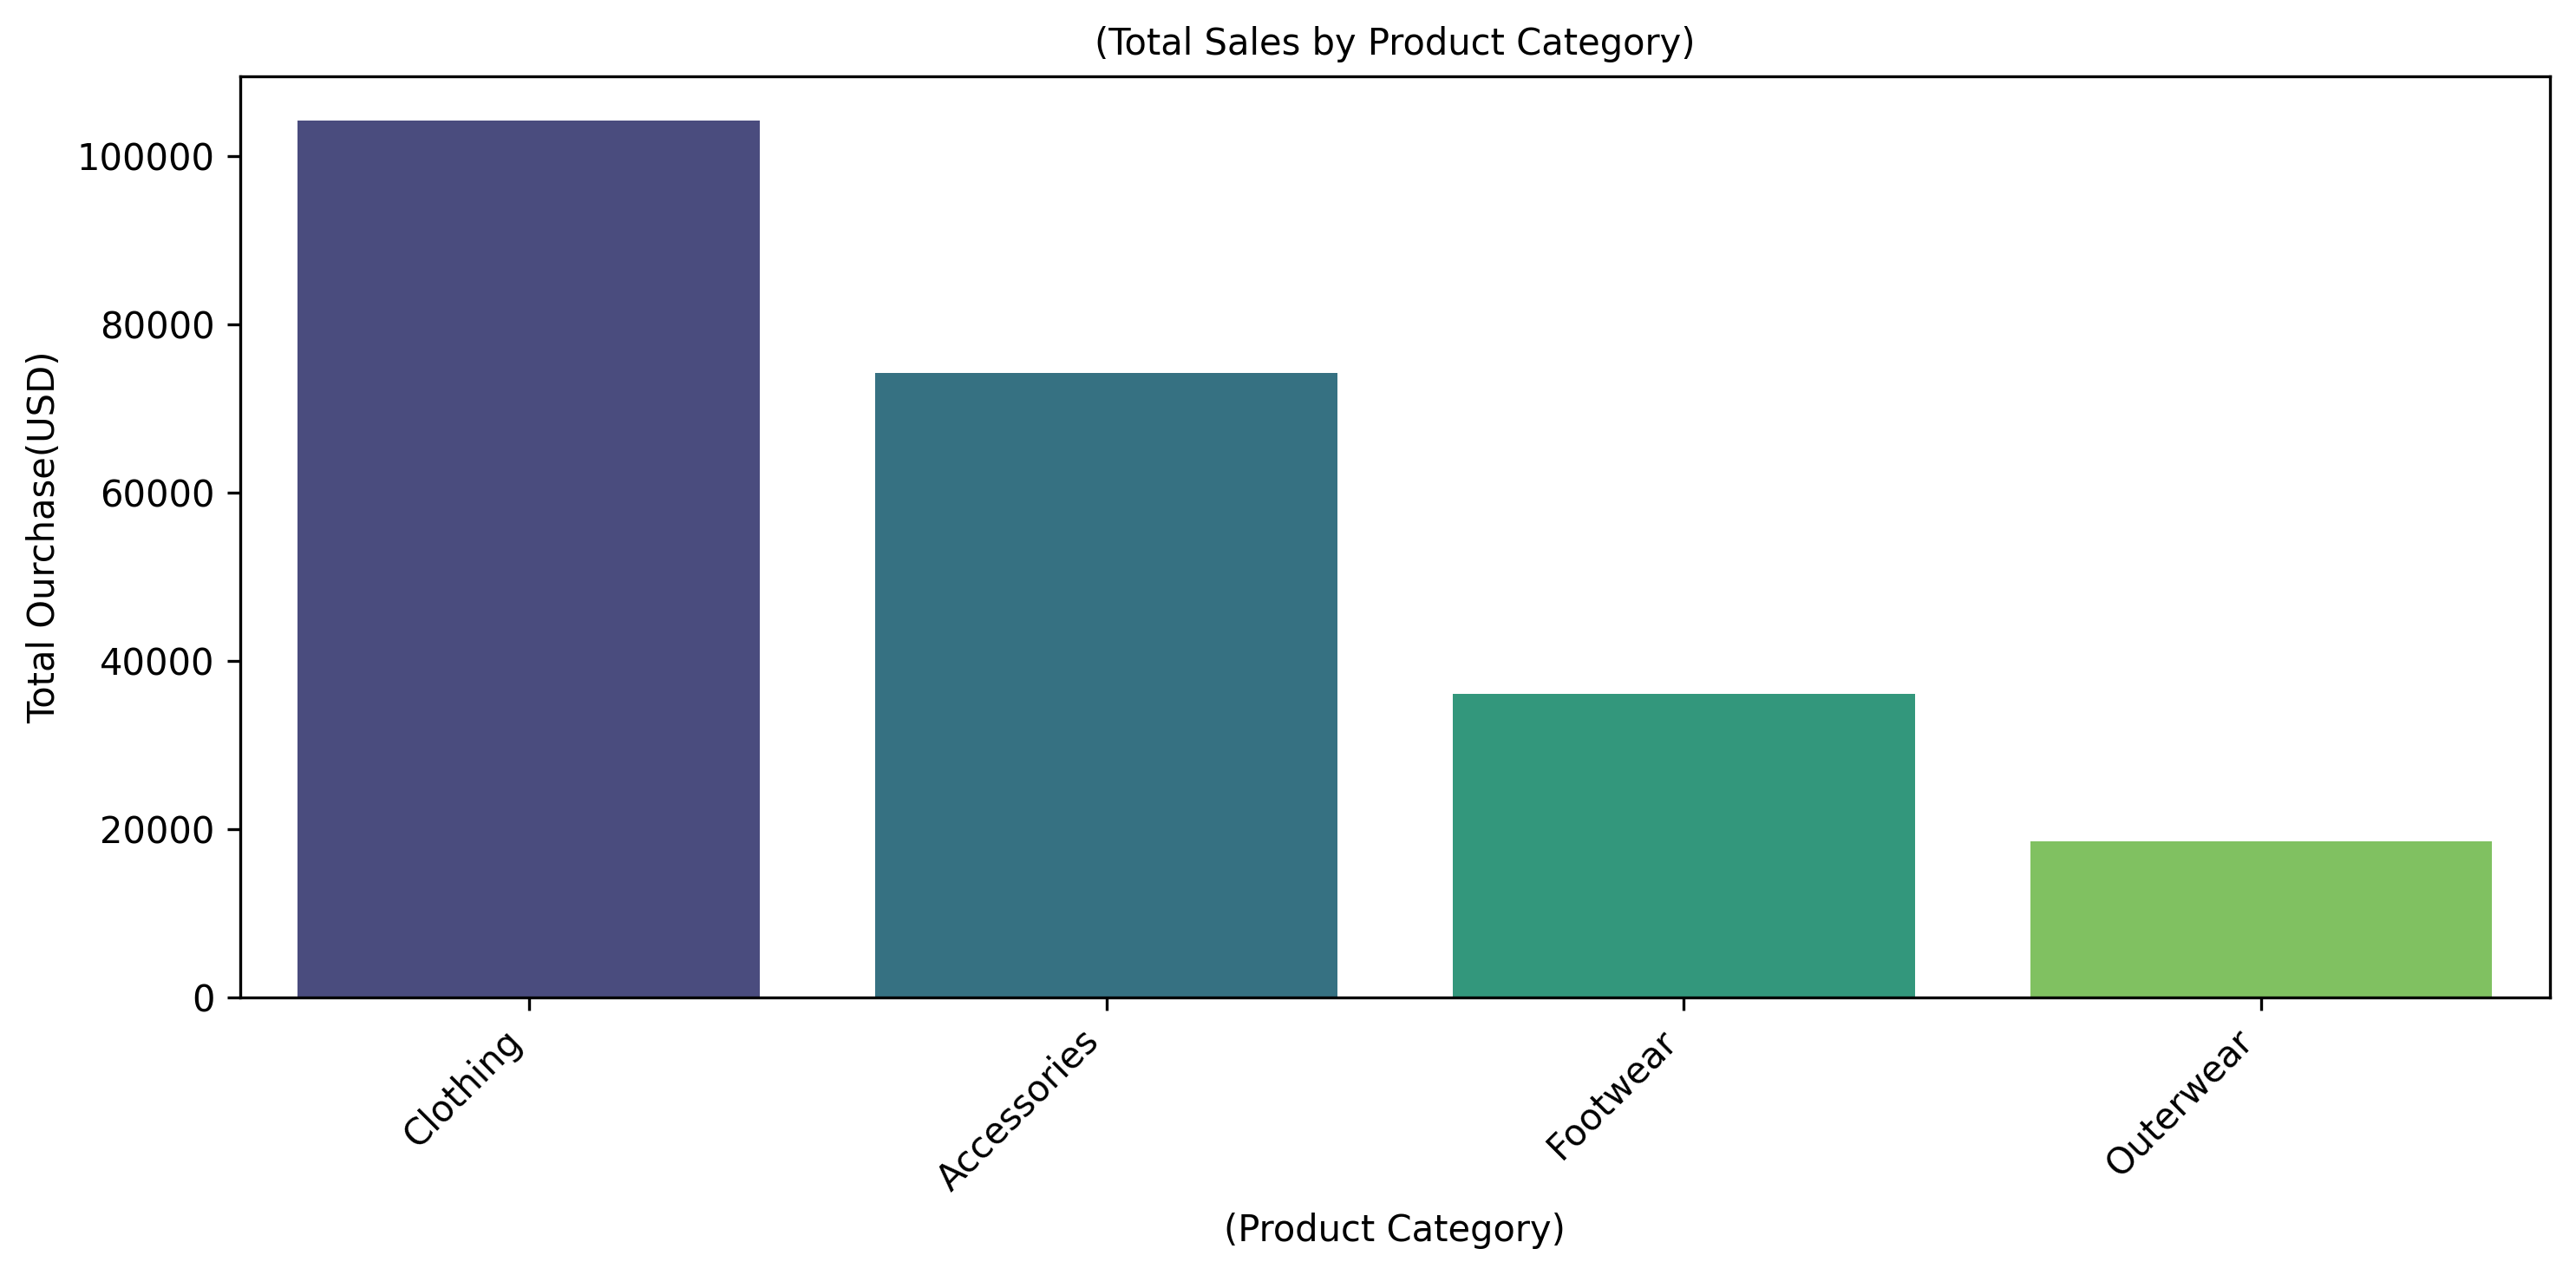

In [ ]:
# 1. สินค้าหมวดไหนขายดีที่สุด?
# ----------------------------------------------------------------------
category_sales = df.groupby('Category')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=category_sales.index, y=category_sales.values, hue=category_sales.index, palette="viridis", legend=False)
plt.title('(Total Sales by Product Category)', fontsize=10)
plt.xlabel('(Product Category)', fontsize=10)
plt.ylabel('Total Ourchase(USD)', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# คำตอบ: สินค้าหมวด Clothing (เสื้อผ้า) เป็นหมวดหมู่ที่มียอดขายรวมสูงสุด  ตามมาด้วย Accessories

# 2.เพศไหนซื้อเยอะกว่ากัน

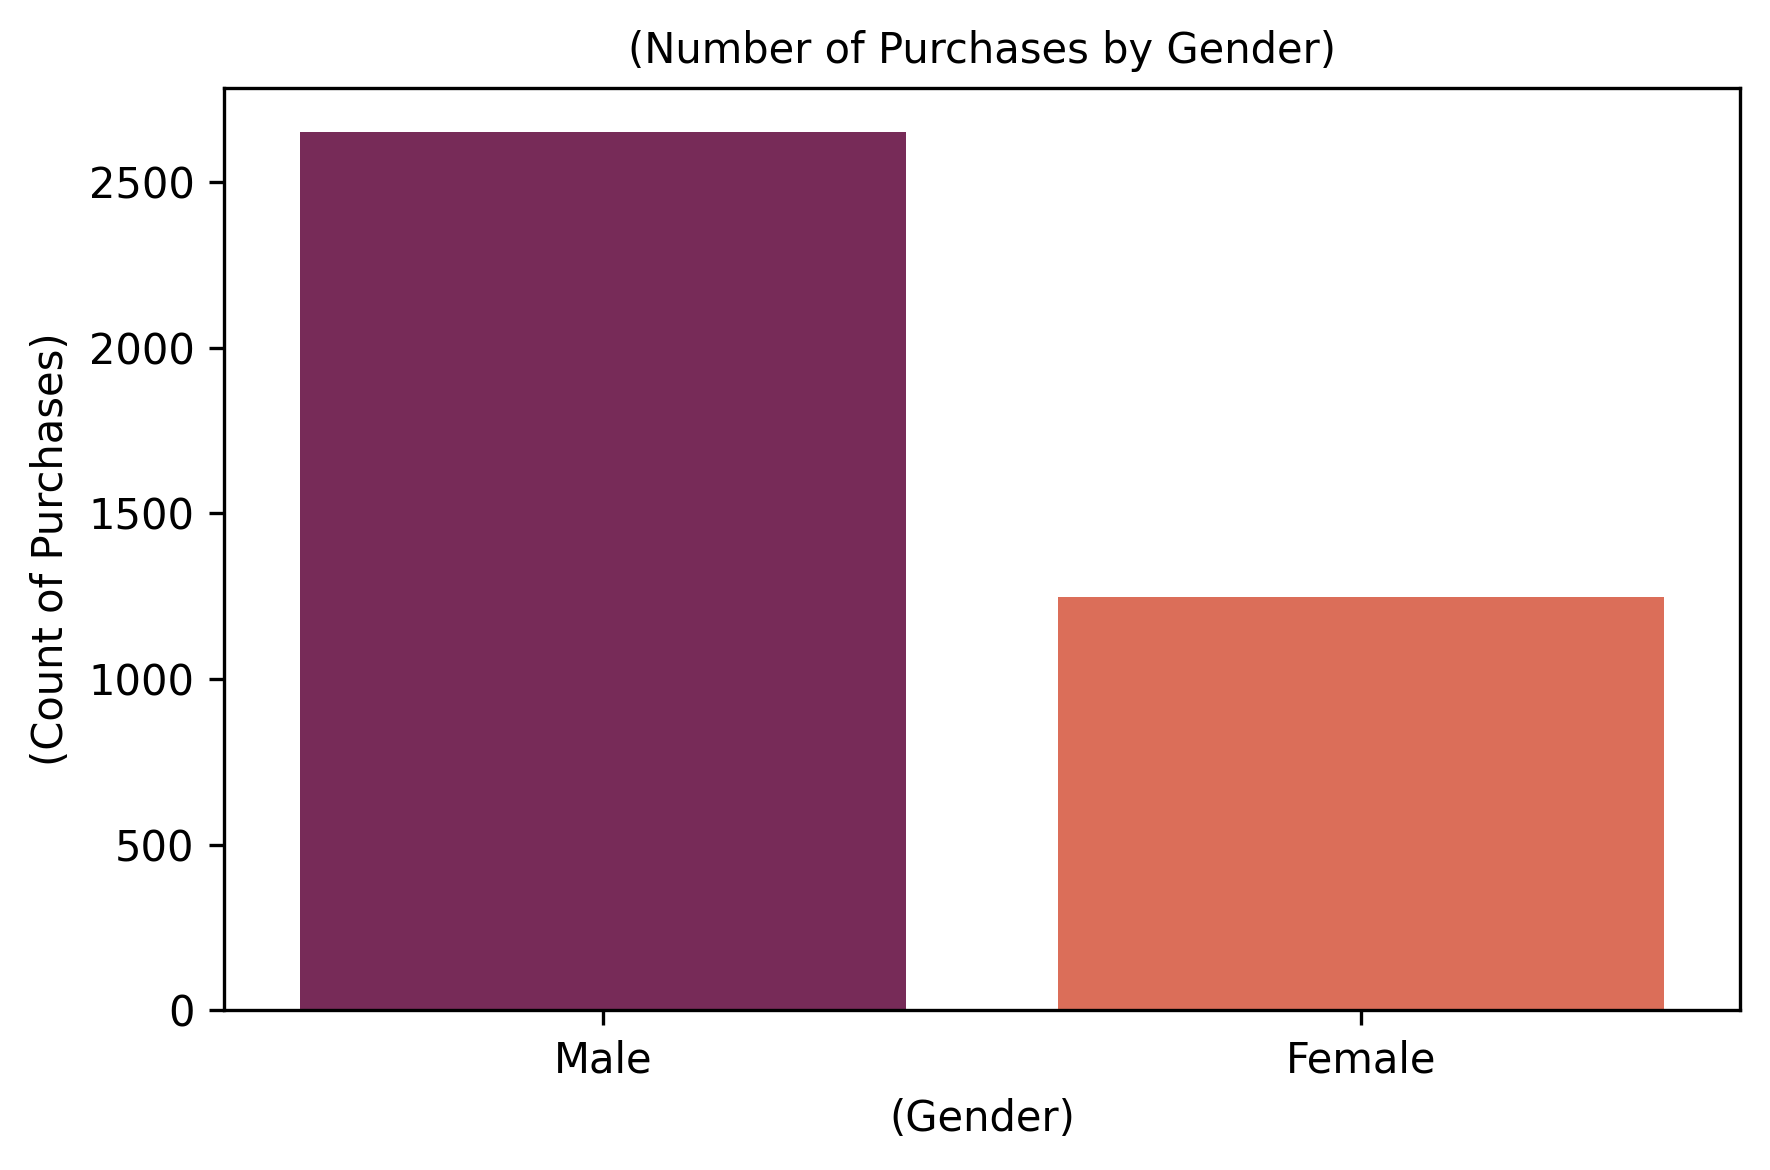

In [ ]:
# 2. เพศไหนซื้อเยอะกว่ากัน?
# ----------------------------------------------------------------------
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, hue=gender_counts.index, palette="rocket")
plt.title('(Number of Purchases by Gender)', fontsize=10)
plt.xlabel('(Gender)', fontsize=10)
plt.ylabel('(Count of Purchases)', fontsize=10)
plt.tight_layout()
plt.show()

# คำตอบ: Male (เพศชาย) มีจำนวนครั้งของการซื้อสูงกว่า Female (เพศหญิง) อย่างชัดเจน

# 3.ฤดูกาลมีผลต่อยอดขายไหม

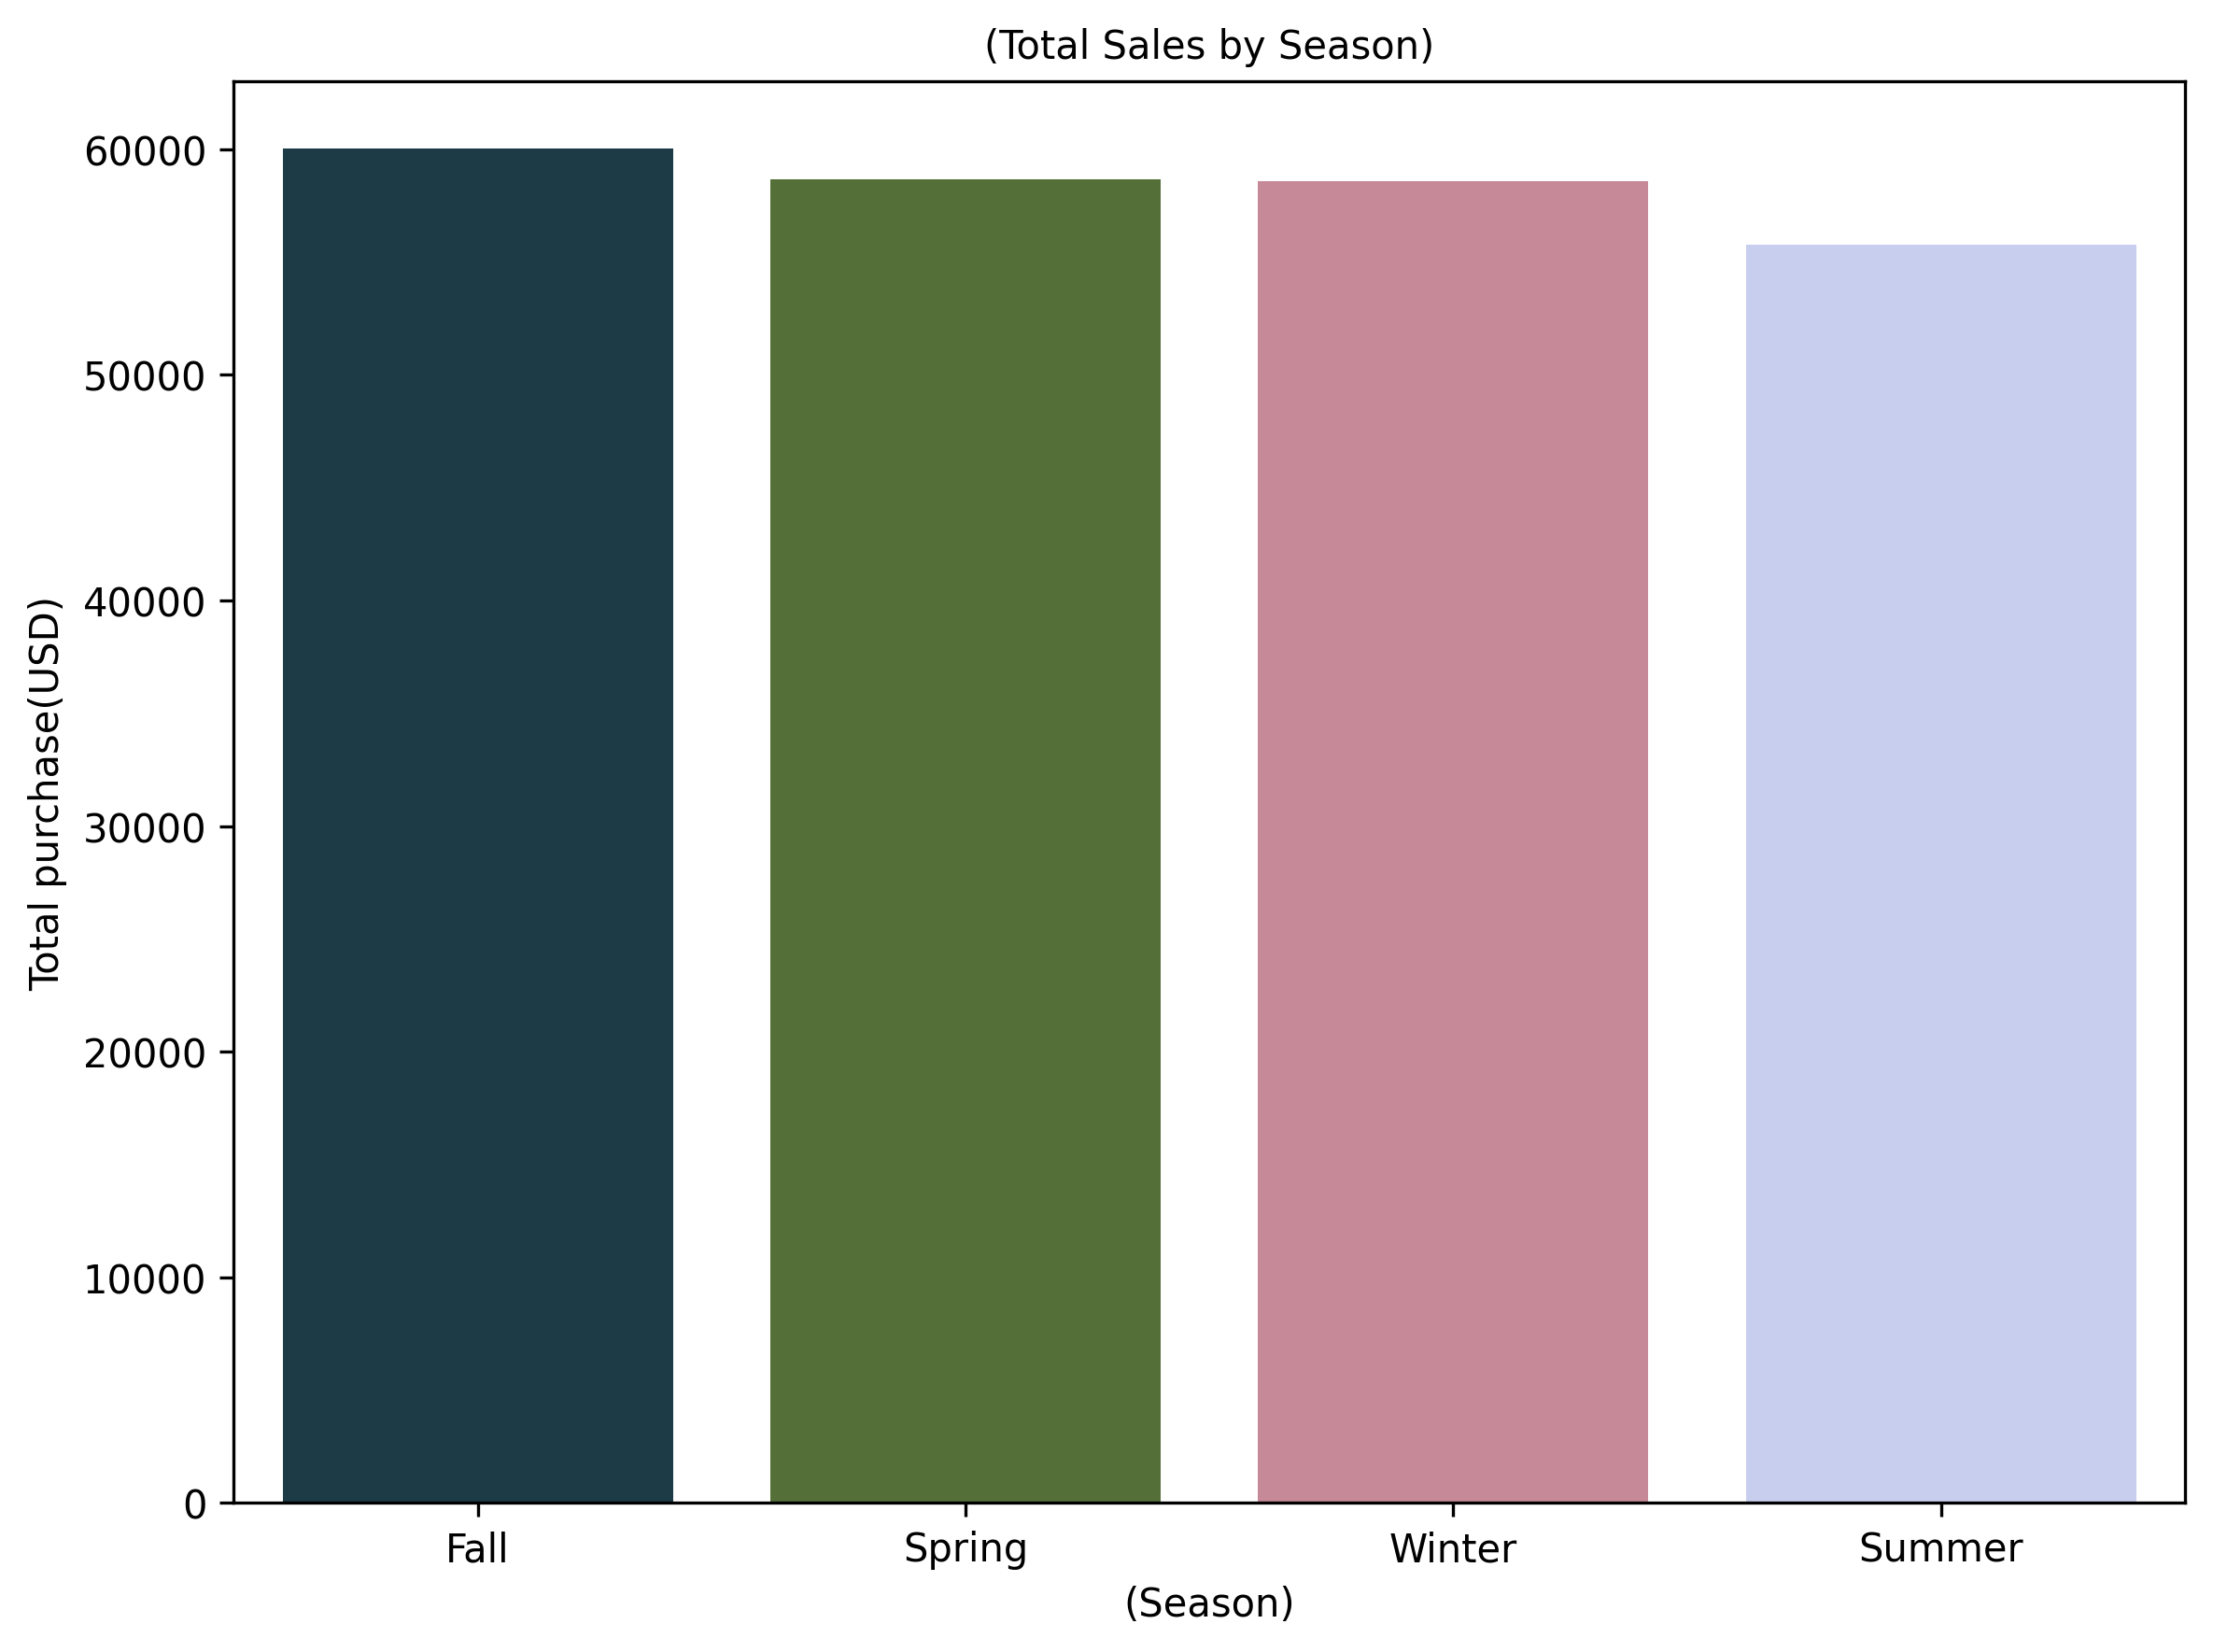

In [ ]:
#3. ฤดูกาลมีผลต่อยอดขายไหม?

season_sales = df.groupby('Season')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 6))

sns.barplot(x=season_sales.index, y=season_sales.values, hue=season_sales.index, palette="cubehelix", legend=False)
plt.title('(Total Sales by Season)', fontsize=10)
plt.xlabel('(Season)', fontsize=10)
plt.ylabel('Total purchase(USD)', fontsize=10)
plt.tight_layout()
plt.show()

# คำตอบ: ยอดขายรวมมีความใกล้เคียงกันในทุกฤดูกาล แต่ Fall (ฤดูใบไม้ร่วง) มียอดขายรวมสูงที่สุดเล็กน้อย

# 4. ส่วนลด (Discount) ช่วยเพิ่มยอดซื้อหรือไม่?

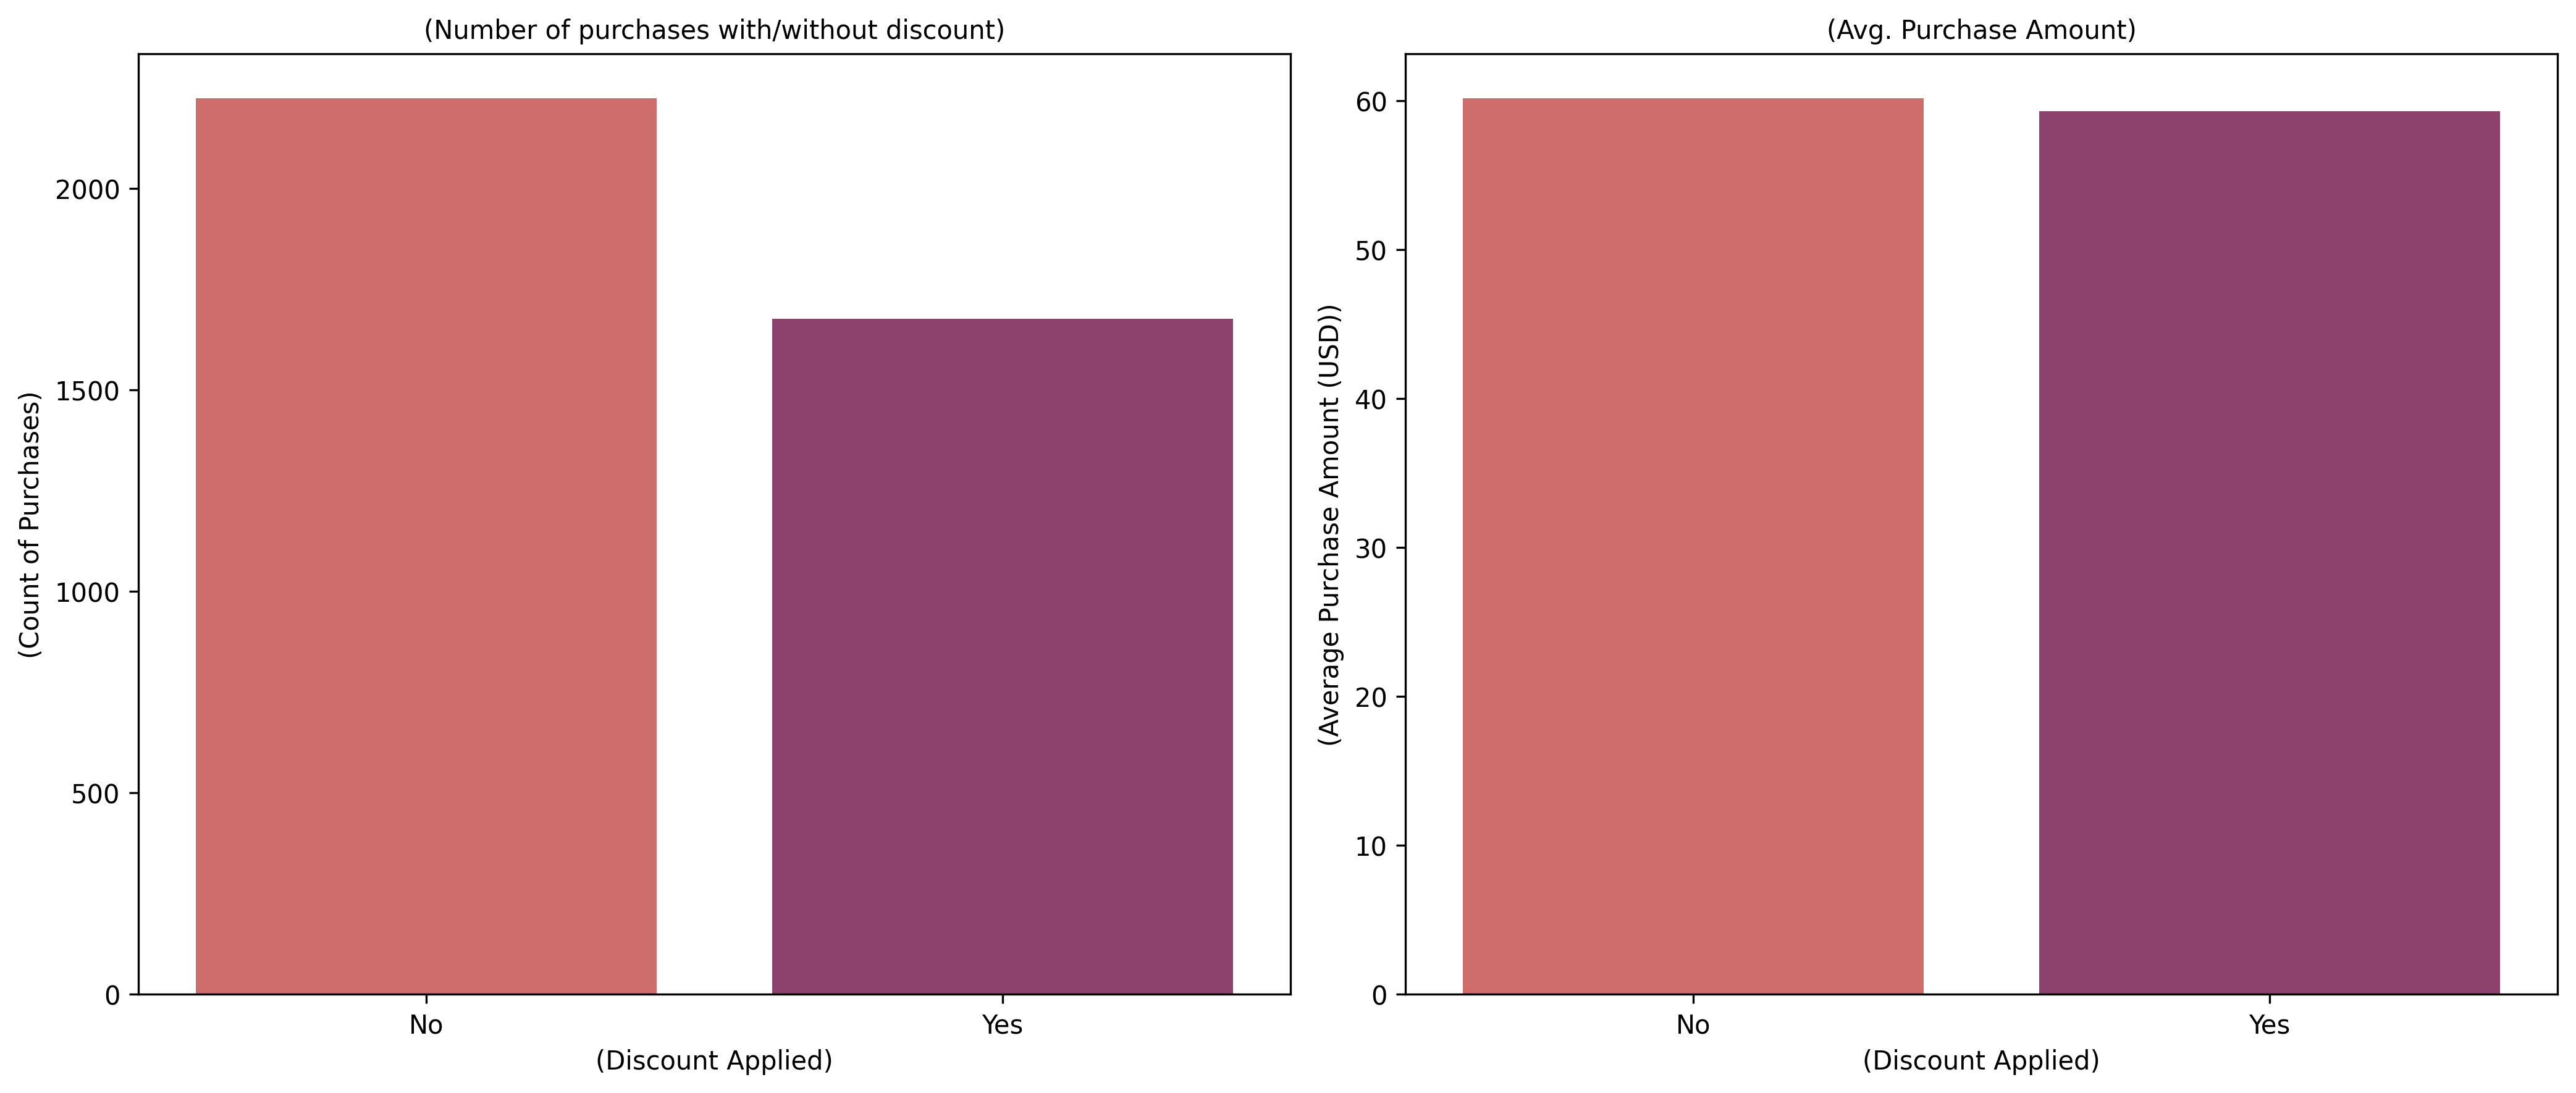

In [ ]:
# 4. ส่วนลด (Discount) ช่วยเพิ่มยอดซื้อหรือไม่?

discount_metrics = df.groupby('Discount Applied')['Purchase Amount (USD)'].agg(['count', 'mean']).reset_index()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# กราฟจำนวนครั้งของการซื้อ
sns.barplot(x='Discount Applied', y='count', data=discount_metrics, ax=ax[0], palette="flare", hue='Discount Applied', legend=False)
ax[0].set_title('(Number of purchases with/without discount)', fontsize=10)
ax[0].set_xlabel('(Discount Applied)', fontsize=10)
ax[0].set_ylabel('(Count of Purchases)', fontsize=10)

# กราฟยอดซื้อเฉลี่ย
sns.barplot(x='Discount Applied', y='mean', data=discount_metrics, ax=ax[1], palette="flare", hue='Discount Applied', legend=False)
ax[1].set_title('(Avg. Purchase Amount)', fontsize=10)
ax[1].set_xlabel('(Discount Applied)', fontsize=10)
ax[1].set_ylabel('(Average Purchase Amount (USD))', fontsize=10)

plt.tight_layout()
plt.show()

# คำตอบ:
# จำนวนครั้งของการซื้อ (Count): ลูกค้าที่ ไม่ได้ใช้ส่วนลด มีจำนวนครั้งในการซื้อมากกว่า  ลูกค้าที่ใช้ส่วนลด
# ยอดซื้อเฉลี่ย (Average Purchase Amount): ยอดซื้อเฉลี่ยของการซื้อที่ ไม่ได้ใช้ส่วนลด  สูงกว่ายอดซื้อเฉลี่ยของการซื้อที่ใช้ส่วนลดเล็กน้อย จากข้อมูลนี้
#ส่วนลดดูเหมือนจะไม่ใช่ปัจจัยหลักในการเพิ่มจำนวนครั้งหรือมูลค่าเฉลี่ยของการซื้อต่อครั้ง

# 5. ช่องทางการจ่ายเงิน (Payment Method) บอกกำลังซื้อได้หรือไม่?

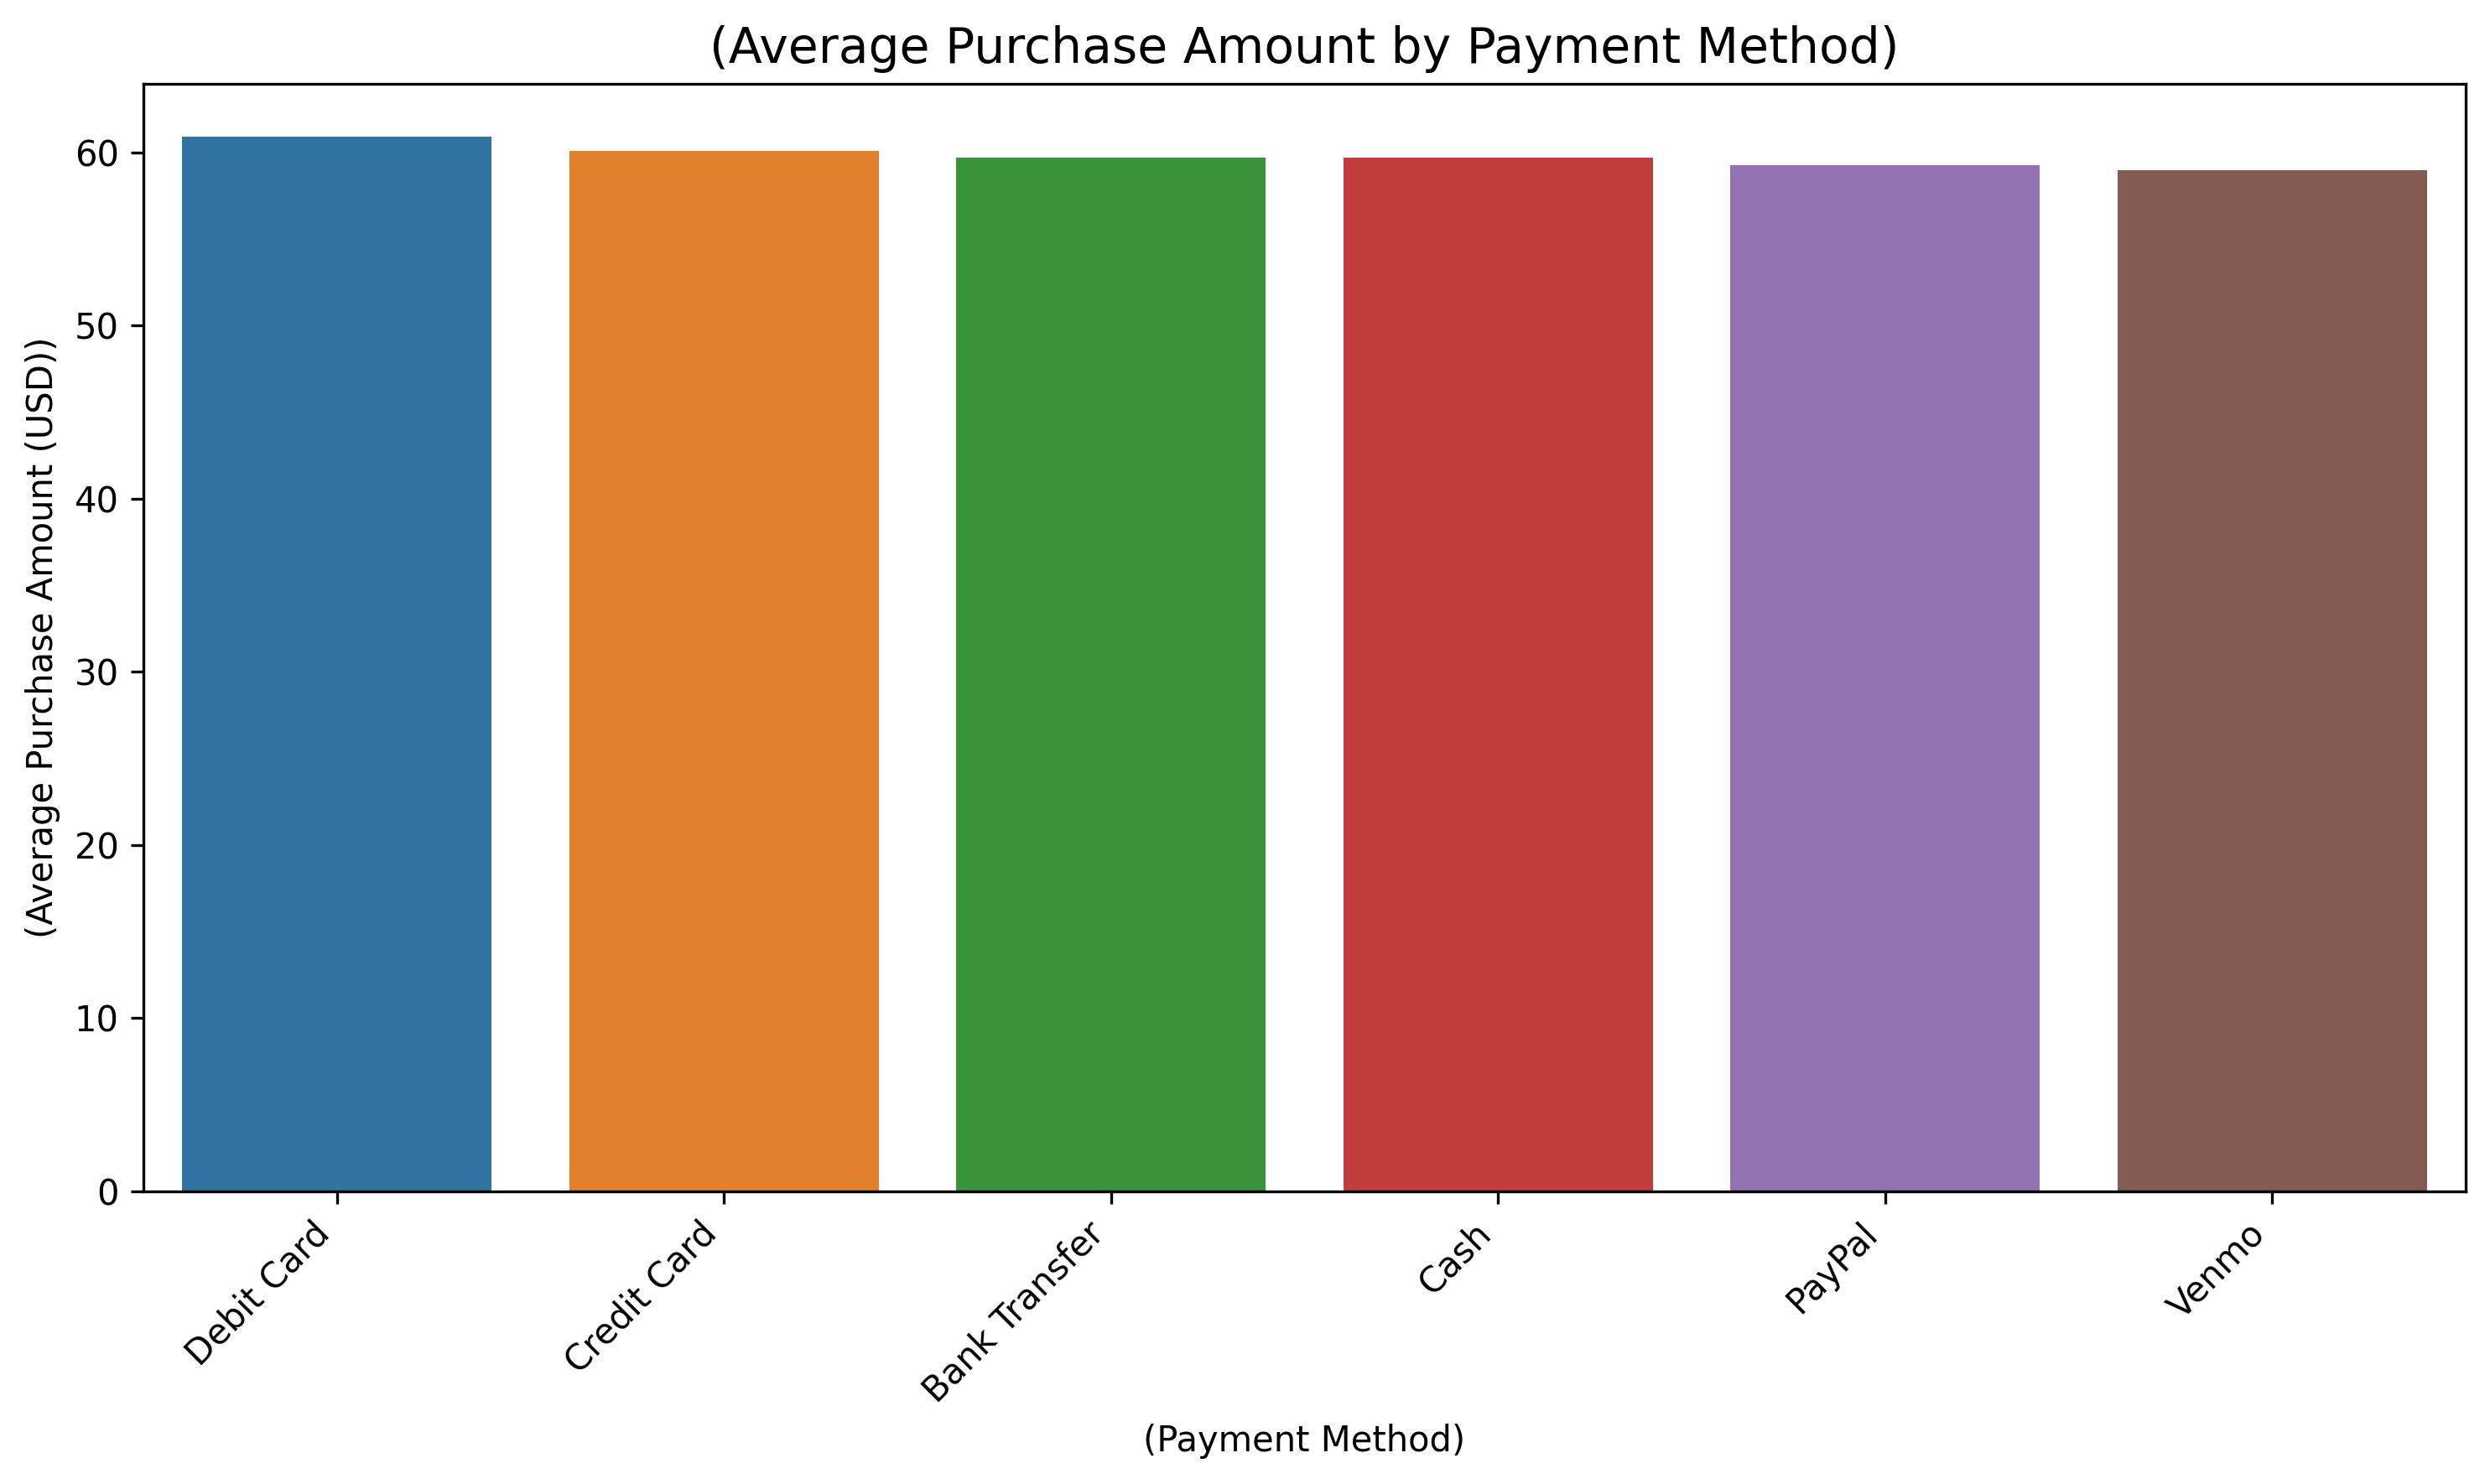

In [ ]:
# 5. ช่องทางการจ่ายเงิน (Payment Method) บอกกำลังซื้อได้หรือไม่?

plot_df = payment_avg_purchase.reset_index(name='Average Purchase Amount (USD)')
plot_df.columns = ['Payment Method', 'Average Purchase Amount (USD)']


# 2. แก้ไขการ Plot โดยเพิ่ม hue และ legend=False
plt.figure(figsize=(10, 6))
sns.barplot(
    data=plot_df,
    x='Payment Method',
    y='Average Purchase Amount (USD)',
    hue='Payment Method',
    palette="tab10",
    legend=False
)
plt.title('(Average Purchase Amount by Payment Method)', fontsize=14)
plt.xlabel('(Payment Method)', fontsize=10)
plt.ylabel('(Average Purchase Amount (USD))', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# คำตอบ:
ยอดซื้อเฉลี่ยต่อครั้งมีความแตกต่างกันน้อยมากในทุกช่องทางการจ่ายเงิน โดย Debit Card มีค่าเฉลี่ยสูงที่สุดเล็กน้อย  และ Venmo มีค่าเฉลี่ยต่ำที่สุดเล็กน้อย  ซึ่งหมายความว่าช่องทางการจ่ายเงิน ไม่ได้เป็นตัวบ่งชี้กำลังซื้อต่อครั้งที่ชัดเจน

# สรุปผลการวิเคราะห์ข้อมูลการซื้อขาย (Data Analysis Summary)
จากการวิเคราะห์ข้อมูลการซื้อขายสินค้าทั้งหมด สามารถสรุปภาพรวมของธุรกิจและพฤติกรรมลูกค้าได้ดังนี้:

1. องค์ประกอบรายได้หลักและโอกาสในการเติบโต
ยอดขายรวมของธุรกิจนี้ถูกขับเคลื่อนโดยหมวดหมู่สินค้าหลักสองกลุ่มอย่างชัดเจน คือ Clothing (เสื้อผ้า) ซึ่งสร้างรายได้สูงสุด ตามมาด้วย Accessories (เครื่องประดับ) ทำให้เห็นว่าธุรกิจควรให้ความสำคัญกับการจัดการสินค้าคงคลังและการตลาดของสินค้าสองกลุ่มนี้เป็นพิเศษ ส่วนสินค้าประเภทอื่น เช่น Footwear และ Outerwear ยังมีส่วนแบ่งยอดขายที่น้อยกว่ามาก


2.   ส่วนลด (Discount): การใช้ส่วนลดไม่มีผลในการกระตุ้นยอดซื้อ โดยลูกค้าที่ซื้อโดยไม่มีส่วนลดมีการซื้อที่บ่อยครั้งกว่าและมียอดใช้จ่ายต่อบิลเฉลี่ยสูงกว่าลูกค้าที่ใช้ส่วนลดเล็กน้อย แสดงว่าส่วนลดที่ใช้อยู่เป็นเพียงการลดกำไรโดยไม่ก่อให้เกิดการซื้อเพิ่มขึ้น

3. ความสม่ำเสมอของยอดขายและพฤติกรรมการจ่ายเงิน
ผลกระทบจากฤดูกาล: ธุรกิจมีความมั่นคงด้านรายได้ตลอดทั้งปี เนื่องจากยอดขายรวมในแต่ละฤดูกาลมีความใกล้เคียงกันมากที่สุด โดยไม่มีฤดูกาลใดที่มียอดขายโดดเด่นอย่างมีนัยสำคัญ
กำลังซื้อจากช่องทางการจ่ายเงิน: ช่องทางการจ่ายเงินที่ลูกค้าเลือกใช้ (เช่น บัตรเครดิต, PayPal, Venmo) ไม่ได้บ่งชี้ถึงความแตกต่างของกำลังซื้อต่อครั้งอย่างชัดเจน เนื่องจากยอดซื้อเฉลี่ยในทุกช่องทางมีความแตกต่างกันเพียงเล็กน้อย

# ข้อเสนอแนะเชิงกลยุทธ์ (Recommendations)อ้างอิงจากข้อมูลข้างต้น ธุรกิจควรพิจารณาข้อเสนอแนะต่อไปนี้เพื่อเพิ่มประสิทธิภาพและผลกำไร:
1. พัฒนาการตลาดสำหรับลูกค้าเพศหญิง (Female Customer Focus)
ปัญหา: จำนวนครั้งในการซื้อของลูกค้าเพศชายสูงกว่าเพศหญิงมากข้อเสนอแนะ:การวิจัย: ทำการวิจัยว่าผลิตภัณฑ์ประเภทใดที่ลูกค้าเพศหญิงสนใจและยังไม่มีอยู่ในร้านค้า หรือทำแคมเปญการตลาดที่เจาะจงสินค้าในหมวดหมู่ Clothing และ Accessories โดยเฉพาะสำหรับลูกค้าเพศหญิง
2. ปรับกลยุทธ์ส่วนลดและโปรโมชัน (Rethink Discount Strategy)
ปัญหา: ส่วนลดปัจจุบันไม่ได้กระตุ้นให้เกิดการซื้อเพิ่มขึ้นข้อเสนอแนะ:หยุดส่วนลดทั่วไป: ลดการให้ส่วนลดแบบสุ่มหรือส่วนลดที่มีผลกระทบต่ำเปลี่ยนโฟกัส: ใช้ส่วนลดเชิงกลยุทธ์เพื่อ:กระตุ้นยอดซื้อสูง: เช่น "ซื้อครบ $150 USD$ รับส่วนลด $20$ USD" เพื่อเพิ่มมูลค่าการซื้อเฉลี่ย (AOV).ขายสินค้าค้างสต็อก: ใช้ส่วนลดสำหรับหมวดหมู่ที่มีกำไรต่ำหรือสินค้าที่ต้องการระบายออก (เช่น Outerwear หรือ Footwear)
3. เพิ่มประสิทธิภาพสินค้าในกลุ่มรายได้รอง (Optimize Secondary Categories)
ปัญหา: Footwear และ Outerwear มีส่วนแบ่งยอดขายรวมน้อยข้อเสนอแนะ:วิเคราะห์ตามฤดูกาล: แม้ภาพรวมจะไม่ต่างกันมาก แต่ควรเน้นการส่งเสริมการขาย Outerwear ในช่วง Fall/Winter และ Footwear ในช่วง Spring/Summer เพื่อให้สอดคล้องกับพฤติกรรมการซื้อที่อาจจะผันผวนตามฤดูการตลาด